Diberikan dataset sebagai berikut:
https://drive.google.com/file/d/1W_-TeeNbSMCHxGhz6TJfEHFHgnyMiBQk/view?usp=share_link



Tulis Identitas anda:

*   Nim: 20.11.3714
*   Nama: Muhammad Bastian Hanafi
*   Kelas: 20 IF 07


**1. Lakukan klasifikasi dengan ketentuan sebagai berikut:**


*   a. gunakan algoritma naive bayes
*   b. gunakan algoritma random forest





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# load dataset
url = 'https://drive.google.com/file/d/1W_-TeeNbSMCHxGhz6TJfEHFHgnyMiBQk/view?usp=share_link'
id_file = url.split('/')[-2]
print(id_file)
baseurl = 'https://drive.google.com/uc?id=' + id_file
df = pd.read_csv(baseurl)
df.head()

1W_-TeeNbSMCHxGhz6TJfEHFHgnyMiBQk


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# convert species feature to numeric
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_encoded = df.copy()
df_encoded['species'] = le.fit_transform(df_encoded['species'])

df_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Feature selection using pearson correlation

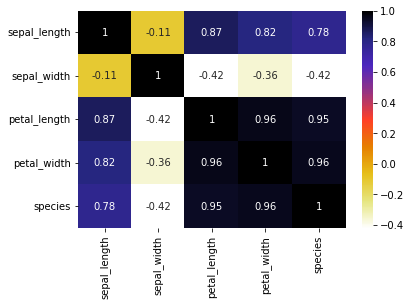

In [5]:
# a. klasifikasi naive bayes
# pearson correlation
cor = df_encoded.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [6]:
# correlation with output variable
corr_target = abs(cor['species'])

relevant_features = corr_target[corr_target > 0.5]
relevant_features

sepal_length    0.782561
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [7]:
# remove unused column
df_encoded.drop(df.columns.difference(['sepal_length','petal_length','petal_width','species']), 1, inplace=True)

<ipython-input-7-2efd4451a520>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_encoded.drop(df.columns.difference(['sepal_length','petal_length','petal_width','species']), 1, inplace=True)


In [8]:
df_encoded.head()

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [9]:
# variabel independent (umur, presentase_presensi, jumlah_akun_sosmed, score_toefl, ipk)
X = df_encoded.iloc[:, [0, 1, 2]].values
# variabel dependent (lulus tepat waktu)
y = df_encoded.iloc[:, 3].values

In [10]:
print(f"X: \n {X[:10]}")
print(f"Y: \n {y[:10]}")

X: 
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]]
Y: 
 [0 0 0 0 0 0 0 0 0 0]


In [11]:
# import classification library
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

# split independent and dependent data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)

In [47]:
X_train.shape


(105, 3)

# **NAIVE BAYES CLASSIFICATION**

In [12]:
from sklearn.naive_bayes import GaussianNB
# using gaussian naive bayes classification method
classifier_model_binary = GaussianNB()
# create classification model with splited data
classifier_model_binary.fit(X_train, y_train)

GaussianNB()

In [13]:
# predict using data testing which splited before
prediction_naiveBayes = classifier_model_binary.predict(X_test)
prediction_naiveBayes

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2])

In [14]:
print(classification_report(y_test, prediction_naiveBayes, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



#**RANDOM FOREST CLASSIFICATION**

In [15]:
# import random forest classifier library
from sklearn.ensemble import RandomForestClassifier
# create classification model 
classifier_model_RFC = RandomForestClassifier(random_state=21)
classifier_model_RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [16]:
# start predict using testing data which splited before
predictions_randomForest = classifier_model_RFC.predict(X_test)
predictions_randomForest

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2])

**2. Lakukan analisa performa naive bayes dan random forest tersebut**

**naive bayes**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


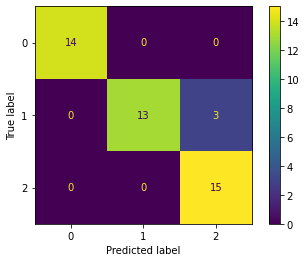

In [17]:
#plot confusion matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier_model_binary, X_test, y_test)
plt.show()

In [18]:
print(classification_report(y_test, prediction_naiveBayes, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



**Random Forest**

[[14  0  0]
 [ 0 13  3]
 [ 0  0 15]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


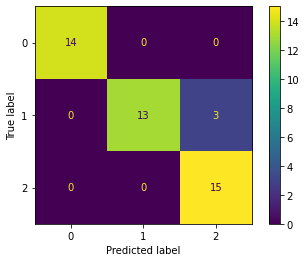

In [19]:
# confusion matrix function a matrix containing the summary of prediction
print(confusion_matrix(y_test, predictions_randomForest))

#plot confusion matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier_model_RFC, X_test, y_test)
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_randomForest, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



#3. Gunakan K-FOLD VALIDATION DENGAN nilai K=10, untuk mengukur performa 2 algoritma tersebut

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

In [22]:
# prepare cross validation 
cv = KFold(n_splits=10, random_state=None, shuffle=False)

naive bayes

In [41]:
# get accuracy naive bayes classification
scoresNB = cross_val_score(classifier_model_binary, X, y, cv=cv)
print(scoresNB)
print(f"\n\nmean accuracy of Naive Bayes classifier : {scoresNB.mean()}")

[1.         1.         1.         0.93333333 0.93333333 0.86666667
 1.         0.86666667 0.86666667 1.        ]


mean accuracy of Naive Bayes classifier : 0.9466666666666667


In [49]:
cross_validate_NB = cross_validate(classifier_model_binary, X, y, cv=cv)
cross_validate_NB = pd.DataFrame(cross_validate_NB)
cross_validate_NB.head(10)
cross_validate_NB.describe()

,fit_time,score_time,test_score
count,10.000000,10.000000,10.000000
mean,0.004638,0.001962,0.946667
std,0.005500,0.003842,0.061262
min,0.001027,0.000605,0.866667
25%,0.001157,0.000635,0.883333
50%,0.001231,0.000701,0.966667
75%,0.009588,0.000770,1.000000
max,0.013336,0.012881,1.000000


random forest

In [42]:
scoresRF = cross_val_score(classifier_model_RFC, X, y, cv=cv)
print(scoresRF)
print(f"\n\nmean accuracy of Naive Bayes classifier : {scoresRF.mean()}")

[1.         1.         1.         1.         0.93333333 0.86666667
 1.         0.86666667 0.73333333 0.93333333]


mean accuracy of Naive Bayes classifier : 0.9333333333333333


In [43]:
cross_validate_RF = cross_validate(classifier_model_RFC, X_test, y_test, cv=cv)
cross_validate_RF = pd.DataFrame(cross_validate_RF)
cross_validate_RF.head(11)

,fit_time,score_time,test_score
0,0.135289,0.008768,1.00
1,0.121681,0.009895,1.00
2,0.114948,0.008399,1.00
3,0.114542,0.008282,0.60
4,0.127991,0.008454,1.00
5,0.117746,0.008651,1.00
6,0.113125,0.013173,0.75
7,0.117930,0.008296,1.00
8,0.135889,0.008392,1.00
9,0.114375,0.008420,1.00


In [27]:
cross_validate_RF.describe()

,fit_time,score_time,test_score
count,10.000000,10.000000,10.00000
mean,0.125630,0.008914,0.93500
std,0.010155,0.000482,0.14152
min,0.115893,0.008456,0.60000
25%,0.116863,0.008663,1.00000
50%,0.122081,0.008703,1.00000
75%,0.136019,0.009098,1.00000
max,0.139334,0.010000,1.00000


4. Lakukan analisa, algoritma mana yang paling baik performanya menurut anda, berikan penjelasannya

setelah membandingkan antara Naive Bayes dan Random Forest, hasilnya sebagai berikut :


1.   Jika menggunakan metode Hold out dengan cara membagi data menjadi 70% data training dan 30% data testing maka saat di evaluasi, ke dua algoritma tersebut memiliki hasil yang sama.
2.   Saat menggunakan K-FOLD validation dengan model yang telah di bangun ke 2 algoritma ini memiliki perbedaan di mana akurasi dari Naive Bayes adalah 94.6% dan akurasi dari Random Forest adalah 93.3%
3. Rata rata waktu fit_time dan score_time saat menggnakan naive bayes lebih cepat.


**Sehingga dapat di ambil kesimpulan bahwa algoritma naive bayes memiliki performa yang lebih baik jika di terapkan untuk klasifikasi dengan dataset yang telah di berikan.**


